# Converting Raw Images to Numpy

In [1]:
import os
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np

def get_all_image_dir_names():
    """
    Function to get a List of all the Directories Containing Images to Convert.
    
    In the folder raw_images we have sub-folders such as 'airliner' which 
    contain jpeg images for that class. This function returns a list of 
    these sub-folders.
    """
    path = "raw_images"
    return os.listdir(path)


def convert_dir_to_imgs(img_dir):
    """
    Function to Convert all Images in a Directory to Numpy Images.
    
    Say we have a directory such as 'airliner' which contains all raw images
    of airliners. This function converts these raw images into a list of
    64x64x3 numpy arrays.
    """
    
    path = "raw_images/" + img_dir
    #print(path)
    # get file names
    img_name_list = os.listdir(path)
    img_shape=(64,64,3)
    images = []
    
    for i, img_name in enumerate(img_name_list):
        #print(i, img_name)
        image = load_img(path + "/" + img_name, target_size=img_shape[:2])
        image = img_to_array(image)/255
        images.append(image)
    images = np.array(images)
  
    return images


def convert_all_images_to_numpy():
    """
    Function to Convert and Save all Images to 64x64x3 Numpy Images.
    
    This function goes through each directory (e.g. 'airliner') and converts
    all the images in each directory to a numpy array containing all the
    64x64x3 images. It saves the numpy array into the folder numpy_images.
    For example, all airliner images are saved as img_airliner.npy.
    """
    # get all directory names
    all_image_classes_string = get_all_image_dir_names()
    
    # loop through directories and save numpy images
    for image_class_name in all_image_classes_string:
        # name for the numpy array containing all 64x64x3 images
        numpy_image_file_name = 'img_' + image_class_name + '.npy'
        save_path = 'numpy_images/' + numpy_image_file_name
        
        np.save(save_path, convert_dir_to_imgs(image_class_name))
        
convert_all_images_to_numpy()

Using TensorFlow backend.
C:\Users\James Peaker\AnacondaInstalledHere\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\James Peaker\AnacondaInstalledHere\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\James Peaker\AnacondaInstalledHere\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\James Peaker\A

### Test

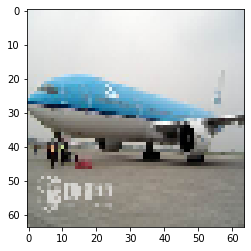

In [2]:
import matplotlib.pyplot as plt

img_airliner = np.load('numpy_images/img_airliner.npy')
fig = plt.figure
plt.imshow(img_airliner[0])
plt.show()

# Loading in the EEG Embeddings and Images

For each image, we want a label (one-hot-encoded) and the EEG embedding.

### Make a Numpy Array Containing all EEG Embeddings

In [5]:
eeg_emb_path = '../aquire_eeg_embeddings/EEG_embeddings/'

all_eeg_embeddings_np = np.array(
    [
        np.load(eeg_emb_path + 'eeg_emb_airliner.npy'),
        np.load(eeg_emb_path + 'eeg_emb_banana.npy'),
        np.load(eeg_emb_path + 'eeg_emb_bolete.npy'),
        np.load(eeg_emb_path + 'eeg_emb_broom.npy'),
        np.load(eeg_emb_path + 'eeg_emb_lycaenid_butterfly.npy'),
        np.load(eeg_emb_path + 'eeg_emb_convertible.npy'),
        np.load(eeg_emb_path + 'eeg_emb_daisy.npy'),
        np.load(eeg_emb_path + 'eeg_emb_egyptian_cat.npy'),
        np.load(eeg_emb_path + 'eeg_emb_german_shepherd.npy'),
        np.load(eeg_emb_path + 'eeg_emb_golf_ball.npy'),
        np.load(eeg_emb_path + 'eeg_emb_electric_guitar.npy'),
        np.load(eeg_emb_path + 'eeg_emb_iron.npy'),
        np.load(eeg_emb_path + 'eeg_emb_jack-o-lantern.npy'),
        np.load(eeg_emb_path + 'eeg_emb_missile.npy'),
        np.load(eeg_emb_path + 'eeg_emb_mitten.npy'),
        np.load(eeg_emb_path + 'eeg_emb_panda.npy'),
        np.load(eeg_emb_path + 'eeg_emb_cellphone.npy'),
        np.load(eeg_emb_path + 'eeg_emb_piano.npy'),
        np.load(eeg_emb_path + 'eeg_emb_radio_telescope.npy'),
        np.load(eeg_emb_path + 'eeg_emb_running_shoe.npy')
    ]
)

### Make a Numpy Array Containing all Images

In [4]:
image_path = "numpy_images/"

all_images_np = np.array(
    [
        np.load(image_path + 'img_airliner.npy'),
        np.load(image_path + 'img_banana.npy'),
        np.load(image_path + 'img_bolete.npy'),
        np.load(image_path + 'img_broom.npy'),
        np.load(image_path + 'img_butterfly.npy'),
        np.load(image_path + 'img_convertible.npy'),
        np.load(image_path + 'img_daisy.npy'),
        np.load(image_path + 'img_egyptian_cat.npy'),
        np.load(image_path + 'img_german_sheps.npy'),
        np.load(image_path + 'img_golf_balls.npy'),
        np.load(image_path + 'img_guitar.npy'),
        np.load(image_path + 'img_iron.npy'),
        np.load(image_path + 'img_jack-o-lantern.npy'),
        np.load(image_path + 'img_missile.npy'),
        np.load(image_path + 'img_mitten.npy'),
        np.load(image_path + 'img_panda.npy'),
        np.load(image_path + 'img_phone.npy'),
        np.load(image_path + 'img_piano.npy'),
        np.load(image_path + 'img_radio_telescope.npy'),
        np.load(image_path + 'img_shoe.npy')
    ]
)

### Make a Numpy Array Containing One-hot Encoded Labels

In [5]:
lab_airliner =         np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
lab_banana =           np.array([0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
lab_bolete =           np.array([0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
lab_broom =            np.array([0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
lab_butterfly =        np.array([0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
lab_convertible =      np.array([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
lab_daisy =            np.array([0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
lab_egyptian_cat =     np.array([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0])
lab_german_sheps =     np.array([0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0])
lab_golf_balls =       np.array([0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0])
lab_guitar =           np.array([0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0])
lab_iron =             np.array([0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0])
lab_jack_o_lantern =   np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0])
lab_missile =          np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0])
lab_mitten =           np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0])
lab_panda =            np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0])
lab_phone =            np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0])
lab_piano =            np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0])
lab_radio_telescope =  np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0])
lab_shoe =             np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])


all_labels_np = np.array(
    [
        lab_airliner,
        lab_banana,
        lab_bolete,
        lab_broom,
        lab_butterfly,
        lab_convertible,
        lab_daisy,
        lab_egyptian_cat,
        lab_german_sheps,
        lab_golf_balls,
        lab_guitar,
        lab_iron,
        lab_jack_o_lantern,
        lab_missile,
        lab_mitten,
        lab_panda,
        lab_phone,
        lab_piano,
        lab_radio_telescope,
        lab_shoe
    ]
)

# Creating the Dataset

### Creating the Unshuffled Dataset

In [6]:
tot_num_images = sum([i.shape[0] for i in all_images_np])
num_classes=20
eeg_embedding_dim=126

dataset = [np.zeros((tot_num_images,num_classes)),np.zeros((tot_num_images,eeg_embedding_dim)),np.zeros((tot_num_images,64,64,3))]


ix = 0

for img_class in np.arange(20):
  # get number of images
  num_images = all_images_np[img_class].shape[0]
    
  # fill in dataset with the images along with num_images amount of embeddings and labels
  for img_ix in np.arange(num_images):
    #fill in labels
    dataset[0][ix] = all_labels_np[img_class] 
    # fill in eeg embeddings
    dataset[1][ix] = all_eeg_embeddings_np[img_class]
    # fill in images
    dataset[2][ix] = all_images_np[img_class][img_ix]
    ix=ix+1

### Shuffle the Data and Save it

In [ ]:
shuffle_indices = np.arange(tot_num_images)
np.random.shuffle(shuffle_indices)

d0 = dataset[0][shuffle_indices]
d1 = dataset[1][shuffle_indices]
d2 = dataset[2][shuffle_indices]
dataset_shuf = [d0,d1,d2]

import pickle as pkl
with open('dataset_shuf.pkl', 'wb') as f:
  pkl.dump(dataset_shuf, f)

### Also Save a List of all EEG Embeddings

In [6]:
with open('all_eeg_embeddings.pkl', 'wb') as f:
  pkl.dump(all_eeg_embeddings_np, f)